In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CAT
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


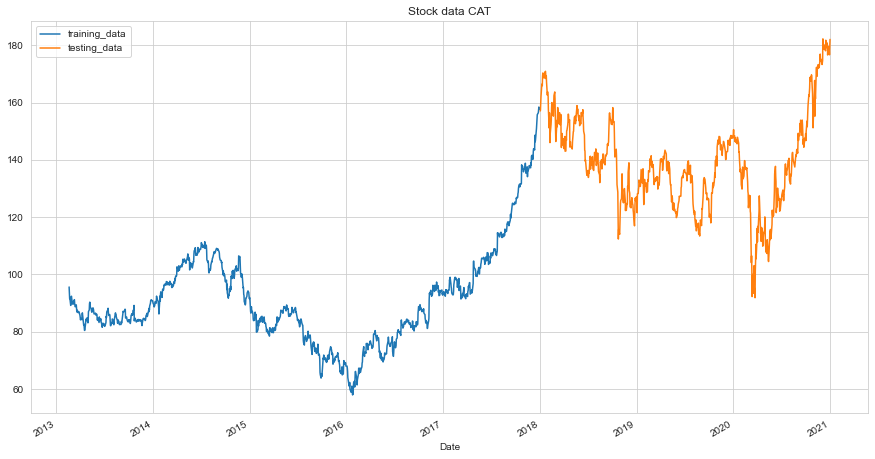

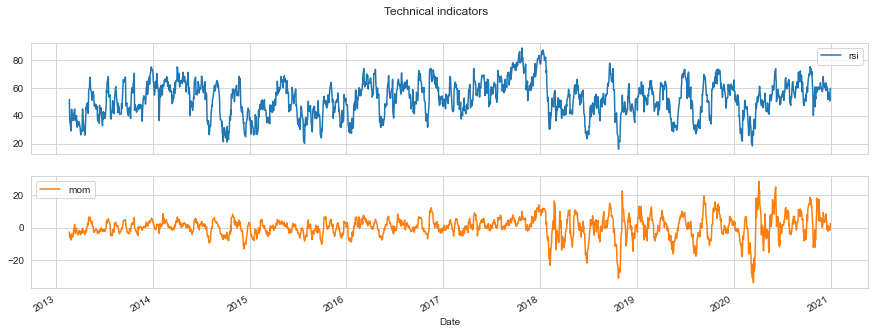

In [2]:
stock_name = 'cat'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1325.18, duration: 0:00:00.206038
episode: 2/2000, episode end value: 1379.80, duration: 0:00:00.171030
episode: 3/2000, episode end value: 1399.70, duration: 0:00:00.182040
episode: 4/2000, episode end value: 1297.75, duration: 0:00:00.192058
episode: 5/2000, episode end value: 1307.76, duration: 0:00:00.193027
episode: 6/2000, episode end value: 1351.77, duration: 0:00:00.211048
episode: 7/2000, episode end value: 1329.92, duration: 0:00:00.221051
episode: 8/2000, episode end value: 1343.37, duration: 0:00:00.229051
episode: 9/2000, episode end value: 1326.37, duration: 0:00:00.214048
episode: 10/2000, episode end value: 1406.86, duration: 0:00:00.208045
episode: 11/2000, episode end value: 1341.18, duration: 0:00:00.205045
episode: 12/2000, episode end value: 1316.07, duration: 0:00:00.203045
episode: 13/2000, episode end value: 1310.42, duration: 0:00:00.208047
episode: 14/2000, episode end value: 1424.71, duration: 0:00:00.190042
episode: 15/200

episode: 117/2000, episode end value: 1365.36, duration: 0:00:00.244572
episode: 118/2000, episode end value: 1354.48, duration: 0:00:00.248399
episode: 119/2000, episode end value: 1370.66, duration: 0:00:00.229053
episode: 120/2000, episode end value: 1305.58, duration: 0:00:00.227809
episode: 121/2000, episode end value: 1379.27, duration: 0:00:00.269349
episode: 122/2000, episode end value: 1370.20, duration: 0:00:00.256056
episode: 123/2000, episode end value: 1284.57, duration: 0:00:00.230054
episode: 124/2000, episode end value: 1240.73, duration: 0:00:00.267061
episode: 125/2000, episode end value: 1243.32, duration: 0:00:00.316071
episode: 126/2000, episode end value: 1253.98, duration: 0:00:00.312074
episode: 127/2000, episode end value: 1226.24, duration: 0:00:00.270062
episode: 128/2000, episode end value: 1295.01, duration: 0:00:00.267149
episode: 129/2000, episode end value: 1343.40, duration: 0:00:00.271061
episode: 130/2000, episode end value: 1309.15, duration: 0:00:00

episode: 231/2000, episode end value: 1316.15, duration: 0:00:00.259057
episode: 232/2000, episode end value: 1432.65, duration: 0:00:00.216049
episode: 233/2000, episode end value: 1619.18, duration: 0:00:00.259059
episode: 234/2000, episode end value: 1279.05, duration: 0:00:00.340079
episode: 235/2000, episode end value: 1350.48, duration: 0:00:00.358551
episode: 236/2000, episode end value: 1305.46, duration: 0:00:00.345082
episode: 237/2000, episode end value: 1313.61, duration: 0:00:00.328073
episode: 238/2000, episode end value: 1353.89, duration: 0:00:00.323758
episode: 239/2000, episode end value: 1309.73, duration: 0:00:00.312130
episode: 240/2000, episode end value: 1358.18, duration: 0:00:00.325075
episode: 241/2000, episode end value: 1375.32, duration: 0:00:00.282063
episode: 242/2000, episode end value: 1275.72, duration: 0:00:00.293066
episode: 243/2000, episode end value: 1386.26, duration: 0:00:00.261672
episode: 244/2000, episode end value: 1377.95, duration: 0:00:00

episode: 345/2000, episode end value: 1302.18, duration: 0:00:00.398505
episode: 346/2000, episode end value: 1322.61, duration: 0:00:00.446505
episode: 347/2000, episode end value: 1288.35, duration: 0:00:00.512117
episode: 348/2000, episode end value: 1339.90, duration: 0:00:00.553124
episode: 349/2000, episode end value: 1357.00, duration: 0:00:00.526121
episode: 350/2000, episode end value: 1308.91, duration: 0:00:00.516117
episode: 351/2000, episode end value: 1288.35, duration: 0:00:00.466105
episode: 352/2000, episode end value: 1242.12, duration: 0:00:00.450416
episode: 353/2000, episode end value: 1256.43, duration: 0:00:00.472471
episode: 354/2000, episode end value: 1386.03, duration: 0:00:00.419490
episode: 355/2000, episode end value: 1384.27, duration: 0:00:00.375097
episode: 356/2000, episode end value: 1324.49, duration: 0:00:00.419553
episode: 357/2000, episode end value: 1236.98, duration: 0:00:00.436688
episode: 358/2000, episode end value: 1257.22, duration: 0:00:00

episode: 459/2000, episode end value: 1597.77, duration: 0:00:00.422297
episode: 460/2000, episode end value: 1486.45, duration: 0:00:00.372973
episode: 461/2000, episode end value: 1242.45, duration: 0:00:00.537388
episode: 462/2000, episode end value: 1284.81, duration: 0:00:00.548902
episode: 463/2000, episode end value: 1330.74, duration: 0:00:00.426194
episode: 464/2000, episode end value: 1251.33, duration: 0:00:00.507108
episode: 465/2000, episode end value: 1271.18, duration: 0:00:00.519234
episode: 466/2000, episode end value: 1289.01, duration: 0:00:00.474849
episode: 467/2000, episode end value: 1254.62, duration: 0:00:00.438003
episode: 468/2000, episode end value: 1316.28, duration: 0:00:00.486788
episode: 469/2000, episode end value: 1315.85, duration: 0:00:00.508005
episode: 470/2000, episode end value: 1360.01, duration: 0:00:00.554126
episode: 471/2000, episode end value: 1272.90, duration: 0:00:00.486111
episode: 472/2000, episode end value: 1277.72, duration: 0:00:00

episode: 573/2000, episode end value: 1365.56, duration: 0:00:00.502736
episode: 574/2000, episode end value: 1305.08, duration: 0:00:00.353925
episode: 575/2000, episode end value: 1259.50, duration: 0:00:00.430335
episode: 576/2000, episode end value: 1397.63, duration: 0:00:00.310322
episode: 577/2000, episode end value: 1318.23, duration: 0:00:00.429858
episode: 578/2000, episode end value: 1460.88, duration: 0:00:00.427412
episode: 579/2000, episode end value: 1334.12, duration: 0:00:00.537533
episode: 580/2000, episode end value: 1359.83, duration: 0:00:00.454771
episode: 581/2000, episode end value: 1327.67, duration: 0:00:00.537820
episode: 582/2000, episode end value: 1315.86, duration: 0:00:00.550901
episode: 583/2000, episode end value: 1494.08, duration: 0:00:00.355010
episode: 584/2000, episode end value: 1284.75, duration: 0:00:00.474279
episode: 585/2000, episode end value: 1302.86, duration: 0:00:00.513972
episode: 586/2000, episode end value: 1268.57, duration: 0:00:00

episode: 687/2000, episode end value: 1361.53, duration: 0:00:00.502314
episode: 688/2000, episode end value: 1308.40, duration: 0:00:00.429499
episode: 689/2000, episode end value: 1338.80, duration: 0:00:00.446065
episode: 690/2000, episode end value: 1519.51, duration: 0:00:00.377421
episode: 691/2000, episode end value: 1231.53, duration: 0:00:00.319331
episode: 692/2000, episode end value: 1570.99, duration: 0:00:00.434993
episode: 693/2000, episode end value: 1279.50, duration: 0:00:00.395482
episode: 694/2000, episode end value: 1330.33, duration: 0:00:00.487597
episode: 695/2000, episode end value: 1349.15, duration: 0:00:00.412590
episode: 696/2000, episode end value: 1270.66, duration: 0:00:00.413588
episode: 697/2000, episode end value: 1298.26, duration: 0:00:00.456302
episode: 698/2000, episode end value: 1255.40, duration: 0:00:00.407371
episode: 699/2000, episode end value: 1244.94, duration: 0:00:00.417893
episode: 700/2000, episode end value: 1395.24, duration: 0:00:00

episode: 801/2000, episode end value: 1469.57, duration: 0:00:00.464830
episode: 802/2000, episode end value: 1547.29, duration: 0:00:00.462310
episode: 803/2000, episode end value: 1246.62, duration: 0:00:00.382348
episode: 804/2000, episode end value: 1259.78, duration: 0:00:00.399483
episode: 805/2000, episode end value: 1256.07, duration: 0:00:00.456106
episode: 806/2000, episode end value: 1241.25, duration: 0:00:00.439226
episode: 807/2000, episode end value: 1252.44, duration: 0:00:00.447216
episode: 808/2000, episode end value: 1262.01, duration: 0:00:00.466144
episode: 809/2000, episode end value: 1242.03, duration: 0:00:00.484912
episode: 810/2000, episode end value: 1248.19, duration: 0:00:00.493794
episode: 811/2000, episode end value: 1244.36, duration: 0:00:00.472978
episode: 812/2000, episode end value: 1279.84, duration: 0:00:00.473541
episode: 813/2000, episode end value: 1268.40, duration: 0:00:00.440282
episode: 814/2000, episode end value: 1256.42, duration: 0:00:00

episode: 915/2000, episode end value: 1603.75, duration: 0:00:00.418966
episode: 916/2000, episode end value: 1296.46, duration: 0:00:00.422845
episode: 917/2000, episode end value: 1282.97, duration: 0:00:00.482297
episode: 918/2000, episode end value: 1288.26, duration: 0:00:00.487480
episode: 919/2000, episode end value: 1269.19, duration: 0:00:00.424961
episode: 920/2000, episode end value: 1274.71, duration: 0:00:00.408190
episode: 921/2000, episode end value: 1256.67, duration: 0:00:00.453820
episode: 922/2000, episode end value: 1299.04, duration: 0:00:00.472548
episode: 923/2000, episode end value: 1350.79, duration: 0:00:00.432479
episode: 924/2000, episode end value: 1341.84, duration: 0:00:00.490968
episode: 925/2000, episode end value: 1357.48, duration: 0:00:00.440708
episode: 926/2000, episode end value: 1358.65, duration: 0:00:00.529574
episode: 927/2000, episode end value: 1368.24, duration: 0:00:00.521249
episode: 928/2000, episode end value: 1362.84, duration: 0:00:00

episode: 1029/2000, episode end value: 1284.33, duration: 0:00:00.487101
episode: 1030/2000, episode end value: 1340.46, duration: 0:00:00.370824
episode: 1031/2000, episode end value: 1247.15, duration: 0:00:00.373139
episode: 1032/2000, episode end value: 1285.88, duration: 0:00:00.391894
episode: 1033/2000, episode end value: 1276.39, duration: 0:00:00.595943
episode: 1034/2000, episode end value: 1273.18, duration: 0:00:00.473928
episode: 1035/2000, episode end value: 1243.78, duration: 0:00:00.405419
episode: 1036/2000, episode end value: 1246.14, duration: 0:00:00.441249
episode: 1037/2000, episode end value: 1259.59, duration: 0:00:00.433914
episode: 1038/2000, episode end value: 1305.80, duration: 0:00:00.462645
episode: 1039/2000, episode end value: 1363.28, duration: 0:00:00.470303
episode: 1040/2000, episode end value: 1304.60, duration: 0:00:00.491686
episode: 1041/2000, episode end value: 1321.31, duration: 0:00:00.494528
episode: 1042/2000, episode end value: 1239.86, dur

episode: 1142/2000, episode end value: 1235.00, duration: 0:00:00.496306
episode: 1143/2000, episode end value: 1331.52, duration: 0:00:00.549167
episode: 1144/2000, episode end value: 1291.07, duration: 0:00:00.516867
episode: 1145/2000, episode end value: 1271.81, duration: 0:00:00.418885
episode: 1146/2000, episode end value: 1247.60, duration: 0:00:00.415564
episode: 1147/2000, episode end value: 1269.87, duration: 0:00:00.507639
episode: 1148/2000, episode end value: 1263.46, duration: 0:00:00.474733
episode: 1149/2000, episode end value: 1337.18, duration: 0:00:00.530694
episode: 1150/2000, episode end value: 1331.12, duration: 0:00:00.472301
episode: 1151/2000, episode end value: 1255.59, duration: 0:00:00.416180
episode: 1152/2000, episode end value: 1289.72, duration: 0:00:00.400491
episode: 1153/2000, episode end value: 1325.38, duration: 0:00:00.398267
episode: 1154/2000, episode end value: 1250.89, duration: 0:00:00.470476
episode: 1155/2000, episode end value: 1246.37, dur

episode: 1255/2000, episode end value: 1278.86, duration: 0:00:00.440460
episode: 1256/2000, episode end value: 1300.11, duration: 0:00:00.463343
episode: 1257/2000, episode end value: 1282.19, duration: 0:00:00.433191
episode: 1258/2000, episode end value: 1268.72, duration: 0:00:00.410504
episode: 1259/2000, episode end value: 1334.79, duration: 0:00:00.470038
episode: 1260/2000, episode end value: 1508.46, duration: 0:00:00.457265
episode: 1261/2000, episode end value: 1338.37, duration: 0:00:00.413129
episode: 1262/2000, episode end value: 1365.68, duration: 0:00:00.485700
episode: 1263/2000, episode end value: 1330.00, duration: 0:00:00.411779
episode: 1264/2000, episode end value: 1255.15, duration: 0:00:00.439878
episode: 1265/2000, episode end value: 1272.43, duration: 0:00:00.475141
episode: 1266/2000, episode end value: 1510.61, duration: 0:00:00.414322
episode: 1267/2000, episode end value: 1256.91, duration: 0:00:00.487997
episode: 1268/2000, episode end value: 1255.52, dur

episode: 1368/2000, episode end value: 1310.51, duration: 0:00:00.440202
episode: 1369/2000, episode end value: 1609.17, duration: 0:00:00.336762
episode: 1370/2000, episode end value: 1420.24, duration: 0:00:00.305620
episode: 1371/2000, episode end value: 1411.60, duration: 0:00:00.377311
episode: 1372/2000, episode end value: 1232.69, duration: 0:00:00.354108
episode: 1373/2000, episode end value: 1426.98, duration: 0:00:00.417201
episode: 1374/2000, episode end value: 1358.47, duration: 0:00:00.382777
episode: 1375/2000, episode end value: 1331.35, duration: 0:00:00.531313
episode: 1376/2000, episode end value: 1390.20, duration: 0:00:00.515874
episode: 1377/2000, episode end value: 1283.99, duration: 0:00:00.465166
episode: 1378/2000, episode end value: 1365.47, duration: 0:00:00.418307
episode: 1379/2000, episode end value: 1349.82, duration: 0:00:00.387241
episode: 1380/2000, episode end value: 1312.63, duration: 0:00:00.478653
episode: 1381/2000, episode end value: 1364.57, dur

episode: 1481/2000, episode end value: 1404.93, duration: 0:00:00.384484
episode: 1482/2000, episode end value: 1322.53, duration: 0:00:00.365020
episode: 1483/2000, episode end value: 1304.62, duration: 0:00:00.371360
episode: 1484/2000, episode end value: 1261.89, duration: 0:00:00.439407
episode: 1485/2000, episode end value: 1272.17, duration: 0:00:00.489001
episode: 1486/2000, episode end value: 1277.87, duration: 0:00:00.494596
episode: 1487/2000, episode end value: 1271.67, duration: 0:00:00.443903
episode: 1488/2000, episode end value: 1356.82, duration: 0:00:00.327361
episode: 1489/2000, episode end value: 1342.44, duration: 0:00:00.375138
episode: 1490/2000, episode end value: 1343.69, duration: 0:00:00.476923
episode: 1491/2000, episode end value: 1282.51, duration: 0:00:00.513306
episode: 1492/2000, episode end value: 1270.11, duration: 0:00:00.470457
episode: 1493/2000, episode end value: 1268.57, duration: 0:00:00.396265
episode: 1494/2000, episode end value: 1349.22, dur

episode: 1594/2000, episode end value: 1380.54, duration: 0:00:00.413121
episode: 1595/2000, episode end value: 1314.09, duration: 0:00:00.309531
episode: 1596/2000, episode end value: 1307.62, duration: 0:00:00.348690
episode: 1597/2000, episode end value: 1263.79, duration: 0:00:00.440144
episode: 1598/2000, episode end value: 1383.50, duration: 0:00:00.424105
episode: 1599/2000, episode end value: 1362.67, duration: 0:00:00.483758
episode: 1600/2000, episode end value: 1285.08, duration: 0:00:00.395831
episode: 1601/2000, episode end value: 1341.09, duration: 0:00:00.512691
episode: 1602/2000, episode end value: 1519.71, duration: 0:00:00.445426
episode: 1603/2000, episode end value: 1305.43, duration: 0:00:00.464514
episode: 1604/2000, episode end value: 1340.72, duration: 0:00:00.413295
episode: 1605/2000, episode end value: 1454.49, duration: 0:00:00.356541
episode: 1606/2000, episode end value: 1345.13, duration: 0:00:00.402842
episode: 1607/2000, episode end value: 1364.09, dur

episode: 1707/2000, episode end value: 1302.84, duration: 0:00:00.485904
episode: 1708/2000, episode end value: 1393.58, duration: 0:00:00.401093
episode: 1709/2000, episode end value: 1383.55, duration: 0:00:00.422380
episode: 1710/2000, episode end value: 1390.38, duration: 0:00:00.409981
episode: 1711/2000, episode end value: 1393.88, duration: 0:00:00.402601
episode: 1712/2000, episode end value: 1340.16, duration: 0:00:00.432873
episode: 1713/2000, episode end value: 1285.25, duration: 0:00:00.503503
episode: 1714/2000, episode end value: 1603.96, duration: 0:00:00.408854
episode: 1715/2000, episode end value: 1259.13, duration: 0:00:00.383509
episode: 1716/2000, episode end value: 1364.20, duration: 0:00:00.374532
episode: 1717/2000, episode end value: 1283.22, duration: 0:00:00.401488
episode: 1718/2000, episode end value: 1241.74, duration: 0:00:00.465383
episode: 1719/2000, episode end value: 1261.31, duration: 0:00:00.452282
episode: 1720/2000, episode end value: 1335.31, dur

episode: 1820/2000, episode end value: 1304.24, duration: 0:00:00.444980
episode: 1821/2000, episode end value: 1379.55, duration: 0:00:00.380543
episode: 1822/2000, episode end value: 1470.95, duration: 0:00:00.355138
episode: 1823/2000, episode end value: 1505.31, duration: 0:00:00.330335
episode: 1824/2000, episode end value: 1246.65, duration: 0:00:00.351959
episode: 1825/2000, episode end value: 1261.11, duration: 0:00:00.384678
episode: 1826/2000, episode end value: 1389.34, duration: 0:00:00.351553
episode: 1827/2000, episode end value: 1286.40, duration: 0:00:00.406725
episode: 1828/2000, episode end value: 1269.90, duration: 0:00:00.400370
episode: 1829/2000, episode end value: 1264.80, duration: 0:00:00.416002
episode: 1830/2000, episode end value: 1377.46, duration: 0:00:00.344674
episode: 1831/2000, episode end value: 1264.18, duration: 0:00:00.457899
episode: 1832/2000, episode end value: 1333.34, duration: 0:00:00.322833
episode: 1833/2000, episode end value: 1260.86, dur

episode: 1933/2000, episode end value: 1310.05, duration: 0:00:00.336188
episode: 1934/2000, episode end value: 1340.57, duration: 0:00:00.353920
episode: 1935/2000, episode end value: 1423.63, duration: 0:00:00.283261
episode: 1936/2000, episode end value: 1390.01, duration: 0:00:00.323398
episode: 1937/2000, episode end value: 1330.78, duration: 0:00:00.331744
episode: 1938/2000, episode end value: 1391.81, duration: 0:00:00.373142
episode: 1939/2000, episode end value: 1285.57, duration: 0:00:00.359019
episode: 1940/2000, episode end value: 1488.25, duration: 0:00:00.321251
episode: 1941/2000, episode end value: 1283.79, duration: 0:00:00.310239
episode: 1942/2000, episode end value: 1247.55, duration: 0:00:00.327281
episode: 1943/2000, episode end value: 1355.49, duration: 0:00:00.306474
episode: 1944/2000, episode end value: 1244.68, duration: 0:00:00.346865
episode: 1945/2000, episode end value: 1369.24, duration: 0:00:00.327028
episode: 1946/2000, episode end value: 1302.20, dur

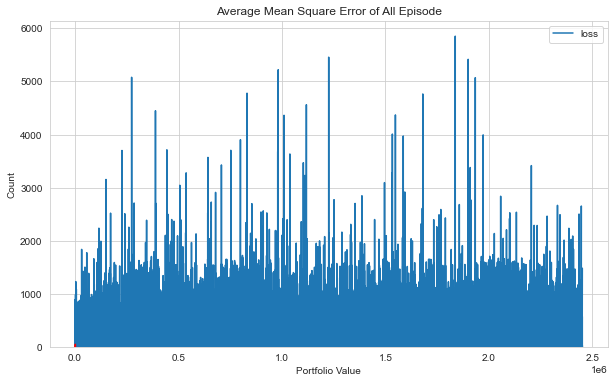

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

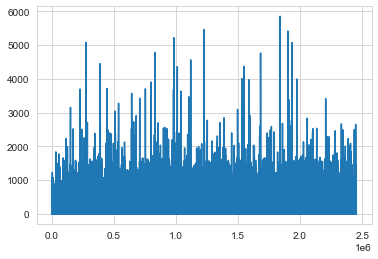

In [5]:
plt.plot(agent.model.losses)

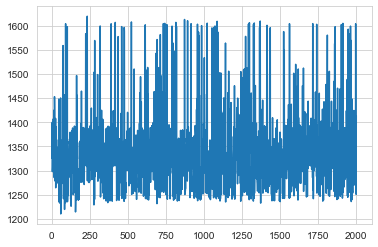

In [6]:
plt.plot(portfolio_value)

episode end value: 1210.47, duration: 0:00:00.153954
Sell: 384 times, Buy: 362 times


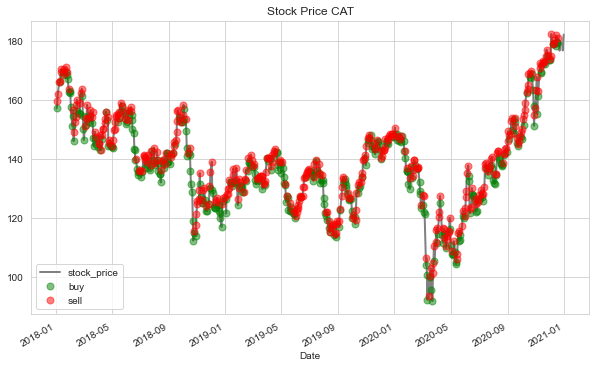

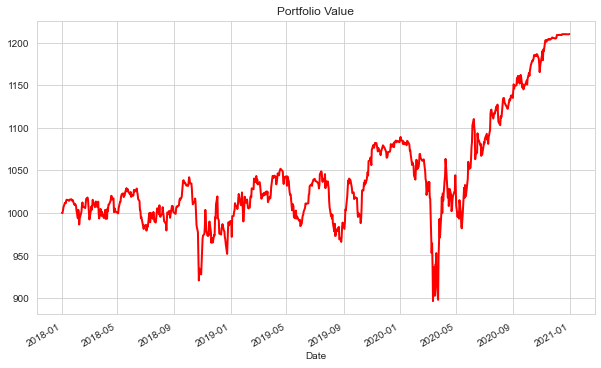

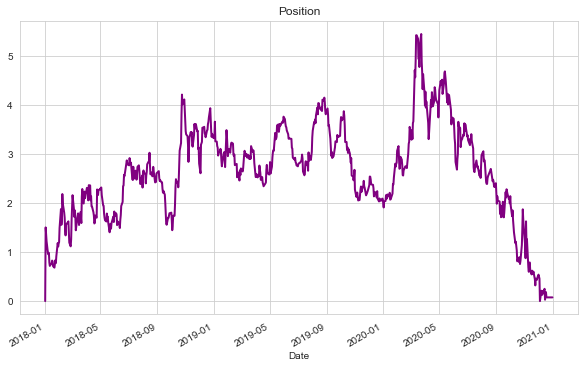

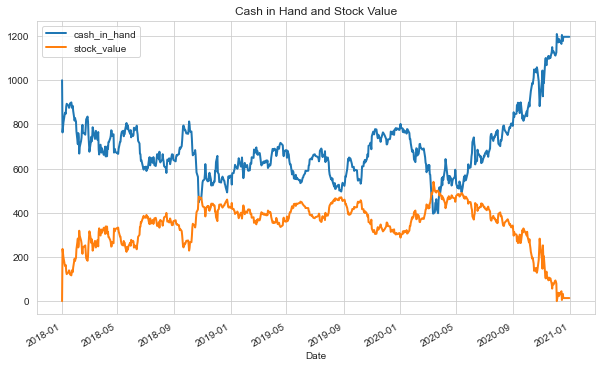

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CAT
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.57 %
Volatility: 0.1424
shape ratio: 0.3845
Maximun drawdown: -17.72 %
Calmar ratio: 0.3709
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.04 %
Volatility (benchmark): 0.3559
shape ratio: 0.1108
Maximun drawdown: -46.25 %
Calmar ratio (benchmark): 0.1090


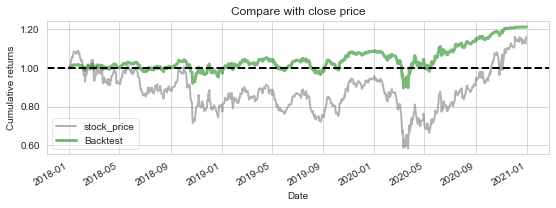

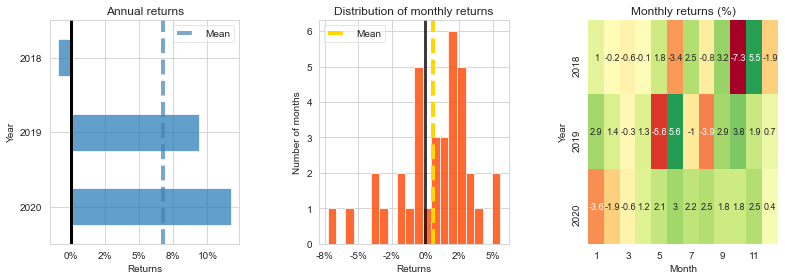

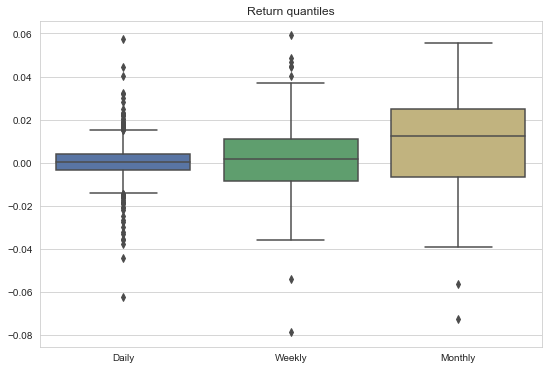

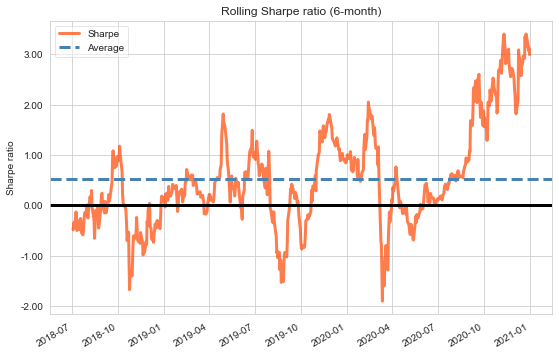

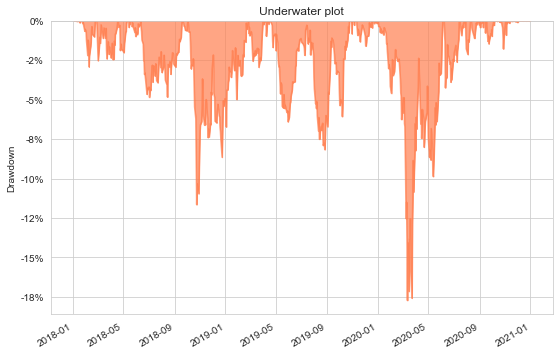

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')